In [2]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import pandas as pd
import pymysql.cursors
from IPython.display import display, HTML
import seaborn as sns

from BtPlenar import BtPlenar

cnx = pymysql.connect(user='root',
                      password='',
                      host='127.0.0.1',
                      charset='utf8mb4',
                      database='btplenar')

si = BtPlenar(cnx)

query = """select Fraktion.name_kurz, mdb.geschlecht, mdb.geburtsdatum
from mandat
LEFT JOIN(mdb, fraktion)
ON (mandat.mdb = mdb.idMdB
AND fraktion.idFraktion = mandat.fraktion)
Where mandat.wahlp = 19"""


raw_data = si.query(query)
df = pd.DataFrame([raw_data[key] for key in raw_data])
df.dropna(inplace=True)

In [3]:
from datetime import datetime
df['geburtsdatum'] = df['geburtsdatum'].apply(pd.to_datetime)
df['Alter'] = df['geburtsdatum'].apply(lambda x: (datetime.today() - x.to_datetime()).days/365.25).astype(int)

Alter                                              
                         count   mean    std   min    25%   50%    75%   max
name_kurz    geschlecht                                                     
AfD          männlich     82.0  51.89  12.49  27.0  45.00  51.5  59.00  78.0
             weiblich     10.0  47.40  10.28  35.0  43.25  45.5  48.00  73.0
CDU/CSU      männlich    197.0  50.48   9.71  25.0  43.00  51.0  58.00  75.0
             weiblich     49.0  50.86    9.4  29.0  43.00  53.0  57.00  66.0
FDP          männlich     61.0  46.62  10.99  25.0  39.00  46.0  53.00  77.0
             weiblich     19.0  44.32  10.41  28.0  36.00  46.0  51.00  62.0
GRÜNE        männlich     28.0  46.75   9.81  33.0  38.75  46.5  53.00  65.0
             weiblich     39.0  48.26   9.63  33.0  39.50  50.0  55.50  65.0
LINKE        männlich     32.0  49.81  10.96  27.0  41.75  50.0  59.25  70.0
             weiblich     37.0  51.41    8.4  35.0  45.00  54.0  58.00  66.0
SPD          männlich     90.0  50.66   9.09  30.0  44.25  51.0  57.75  68.0
             weiblich     65.0  51.05   9.28  31.0  47.00  53.0  57.00  68.0
fraktionslos männlich      1.0  42.00      -  42.0  42.00  42.0  42.00  42.0
             weiblich      1.0  42.00      -  42.0  42.00  42.0  42.00  42.0

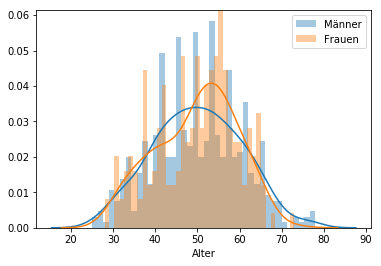

In [4]:
männer = df.where(df['geschlecht'] == 'männlich').dropna()
frauen = df.where(df['geschlecht'] == 'weiblich').dropna()

sns.distplot(männer['Alter'], bins=40)
sns.distplot(frauen['Alter'], bins=40)
plt.legend(['Männer', 'Frauen'])

df.groupby(['name_kurz', 'geschlecht']).describe().round(2).fillna('-')
